# World Happiness Report


# Problem Statement:
 
 
Context




The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.



# What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

# What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 



# What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?





The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.


The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.





The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

Note: You can find the dataset in the link below.

# # Always refer.
For any queries about algorithm follow the given below link.




https://scikit-learn.org/stable/index.html

In [1]:
#Lets import libraries for get dataset
import numpy as np
import pandas as pd

In [2]:
#Lets load dataset
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
#Lets check the shape of the dataset
data.shape

(158, 12)

So, we have 152 rows and 12 column.

In [4]:
#Checking Nan Values
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

So, we dont have Nan values . we are good to proceed.

In [5]:
#Lets check the datatype of the columns
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

So, 2 columns has object type data ["Country and Region"] and 1 column has int64 dataype['Region'] and left columns hace float value . and all know float values is 99 % of time its a continious data .

# Features ,

- Country


- Region


- Happiness Rank


- Happiness Score


- Standard Error



- Economy (GDP per Capita)



- Family



- Health (Life Expectancy)


- Freedom



- Health (Life Expectancy)



- Freedom



- Trust (Government Corruption)




- Generosity




# Target





- Dystopia Residual



In [6]:
#Lets use loc method and check thre is any blank space are available in target columns.
data.loc[data['Dystopia Residual']==" "]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


So , in our target column there is no blank space  and we also dont have null value . we are good to proceed.

In [7]:
# Lets check data description
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Lets do EDA (Exploratory Data Analysis)

In [8]:
#Lets check the relationship between all features vs label.
#For that we have to import datavisualization tools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Lets make DataFrame for the Nominal Data. 

(Selecting Categorical Columns)

In [9]:
data_cat=data[['Country','Region']]
data_cat

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
153,Rwanda,Sub-Saharan Africa
154,Benin,Sub-Saharan Africa
155,Syria,Middle East and Northern Africa
156,Burundi,Sub-Saharan Africa


# Visualization of the Data

For the nominal categorical data we will use Countplot. but not in for both columns.  we will check for only one columns Region .


Because first column is country name of 157 countries . and we know that there is no repaetation of the same country name .

But we have to check region becasue for multiple countries we have same region . lets check according to region.

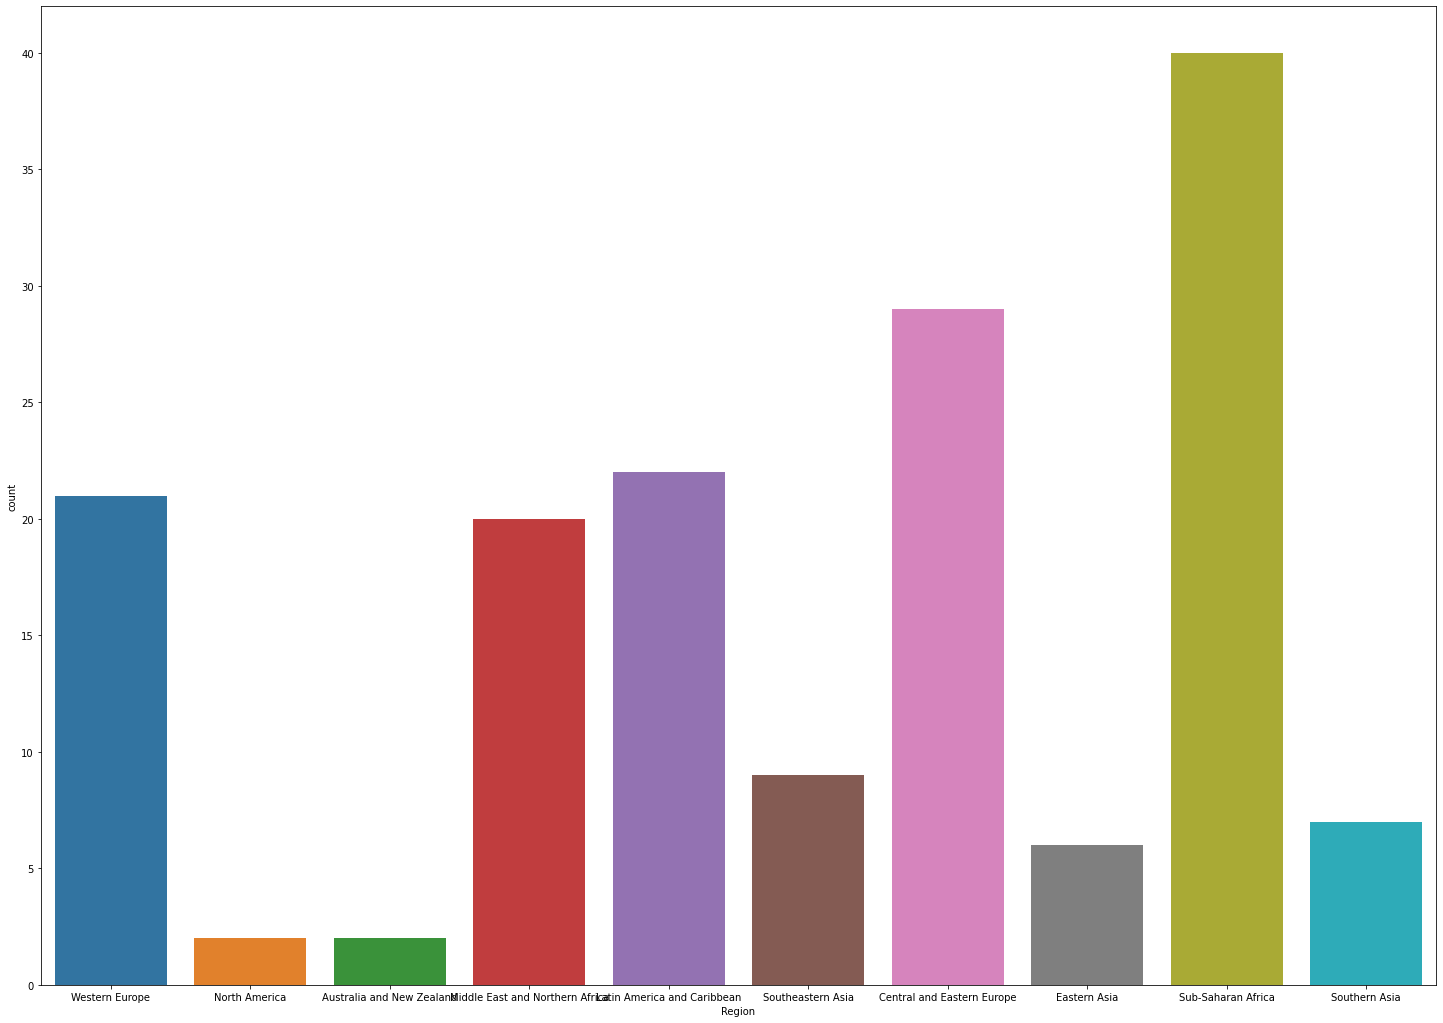

In [10]:
plt.figure(figsize=(25,18))
sns.countplot(x='Region',data=data_cat)
plt.show()

So here we clearly see . we have 10 region . 
and we have

 More countries from 

- Western Europe

- Middle East And Northern Africa

- Latin America and Caribbean

- Central and Eastern Europe

- Sub-Saharan Africa



Less Countries from



- North America

- Australia and New Zealand

- Southeastern Asia

- Eastern Asia

- Southern Asia

In [11]:
#Lets check all countries are different from all countries data
data_cat['Country'].value_counts().unique()

array([1], dtype=int64)

Here , we can see that there is no repeatation of any country name

# Lets check relationship between feature and label. 

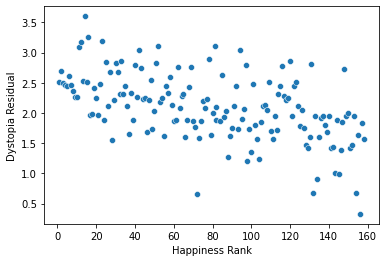

In [12]:
sns.scatterplot(x='Happiness Rank',y='Dystopia Residual',data=data)
plt.show()

Here, we can clearly see in Happiness Rank and Dystopia Residual they have  some relations.

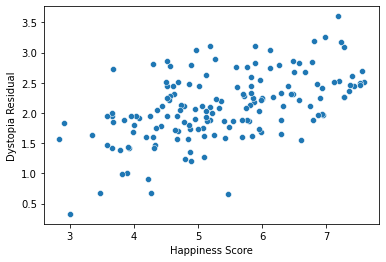

In [13]:
sns.scatterplot(x='Happiness Score',y='Dystopia Residual',data=data)
plt.show()

Here, we can clearly see in Happiness Score and Dystopia Residual there is some relation .
But we cannot say that there is good relation . 

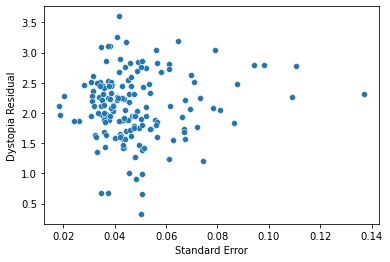

In [14]:
sns.scatterplot(x='Standard Error',y='Dystopia Residual',data=data)
plt.show()

Here, we can clearly see in Standard Error and Dystopia Residual there is no relation .
Maximum data points liew between 0.04 to 0.06 

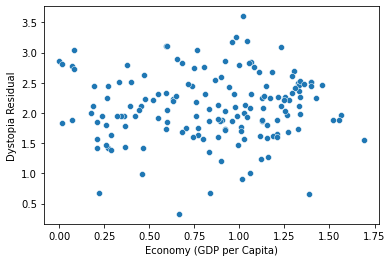

In [15]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Dystopia Residual',data=data)
plt.show()

Here, we can clearly see in 'Economy (GDP per Capita) and Dystopia Residual there is some relation .
But we cannot say that there is good relation . 

Because maximum data point lie on middile of the graph


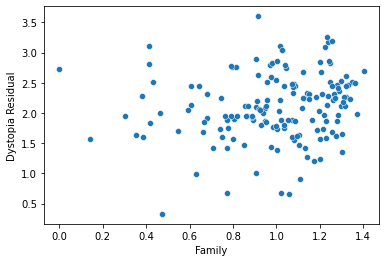

In [16]:
sns.scatterplot(x='Family',y='Dystopia Residual',data=data)
plt.show()

Here, we can clearly see in 'Family and Dystopia Residual there is some relation .
But we cannot say that there is good relation . 

Because maximum data point lie on 0.8 to 1.3


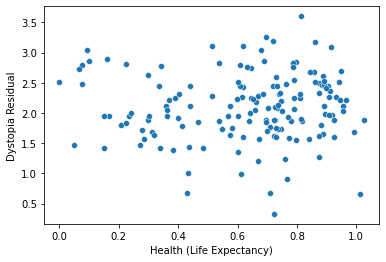

In [17]:
sns.scatterplot(x='Health (Life Expectancy)',y='Dystopia Residual',data=data)
plt.show()

Here, we can clearly see in Health (Life Expectancy) and Dystopia Residual there is some relation .
But we cannot say that there is good relation . 

Because maximum data point lie on 0.6 to 1.9


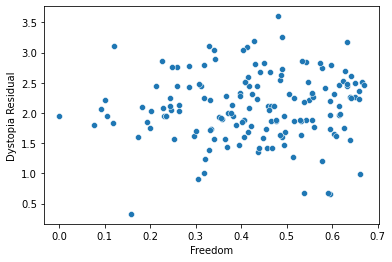

In [18]:
sns.scatterplot(x='Freedom',y='Dystopia Residual',data=data)
plt.show()

Here, we can clearly see in Freedom and Dystopia Residual there is some relation .
But we cannot say that there is good relation . 

Because maximum data point lie on 0.3 to 0.5

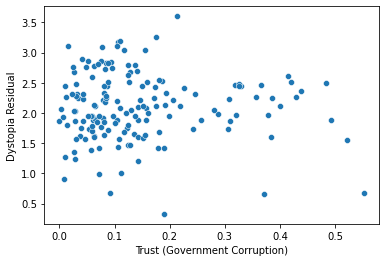

In [19]:
sns.scatterplot(x='Trust (Government Corruption)',y='Dystopia Residual',data=data)
plt.show()

We clearly see that , there is no relationship between Trust (Government Corruption) and Dystopia Residual.

Maximum data points lie between 0.0 to 0.2

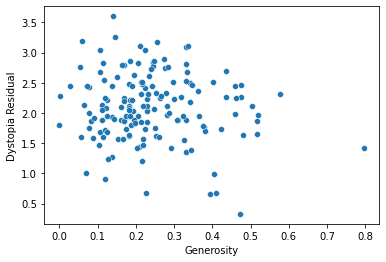

In [20]:
sns.scatterplot(x='Generosity',y='Dystopia Residual',data=data)
plt.show()

We clearly see that , there is no relationship between Trust (Government Corruption) and Dystopia Residual.

Maximum data points lie between 0.0 to 0.5

# Lets check Distribution of all Column except Categorical column.

In [21]:
data_dist=data.drop(columns=['Country','Region'],axis=1)#Here we assigning in the new variable for checking distribution using distplot.

In [22]:
import warnings
warnings.filterwarnings('ignore')

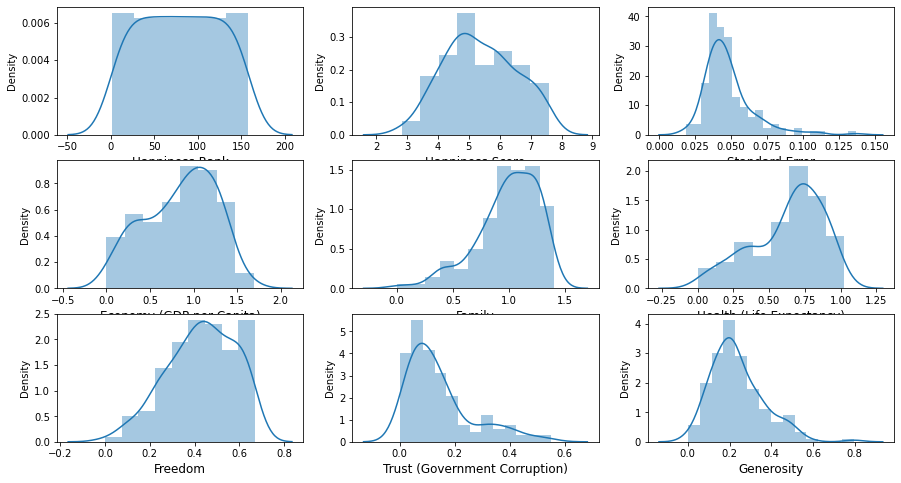

In [23]:
plt.figure(figsize=(15,8))
plotnumber=1
for col in data_dist:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=12)
    plotnumber +=1
plt.show()

According to the distributiion we see that . all data has almost normally distributed . but we have ouliers in Standard Error .

We will see later the outliers.

# Now Proceed to Use Encoding Technique.

Since , The dataset have 2 string values . we will use encoding technique to convert the string data to numerical one.

# Encoding of DataFrame

In [24]:
# Lets import ordinal encoder .
from sklearn.preprocessing import LabelEncoder #We use ordinal encoder because coutry column has follow some order in Rank.

enc=LabelEncoder()#Here we assigning the name

for i in data.columns: #Here we run the loop for iterate every column.
    if data[i].dtypes=='object':#Here we set . only apply label encoder on object data type
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))# here we applying method
data.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


# Describe the Datset with colors.

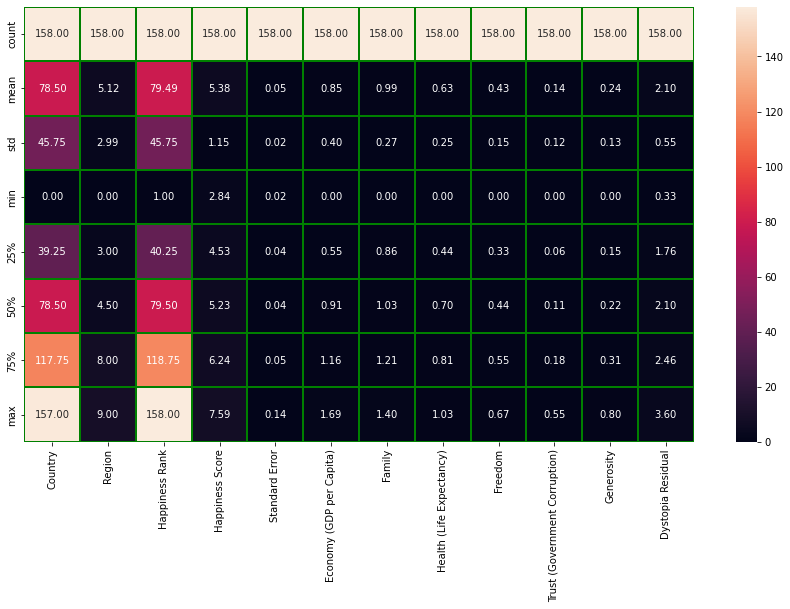

In [25]:
#Only Continious Columns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(data.describe(),annot=True,linewidths=0.1,linecolor='green',fmt="0.2f")
plt.show()

# Correlation of the columns with the target columns.

In [26]:
data.corr()['Dystopia Residual'].sort_values()

Happiness Rank                  -0.521999
Generosity                      -0.101301
Region                          -0.057276
Trust (Government Corruption)   -0.033105
Country                         -0.019778
Health (Life Expectancy)         0.018979
Economy (GDP per Capita)         0.040059
Freedom                          0.062783
Standard Error                   0.083981
Family                           0.148117
Happiness Score                  0.530474
Dystopia Residual                1.000000
Name: Dystopia Residual, dtype: float64

Here i am taking +/- 0.5 is a good correlated. 

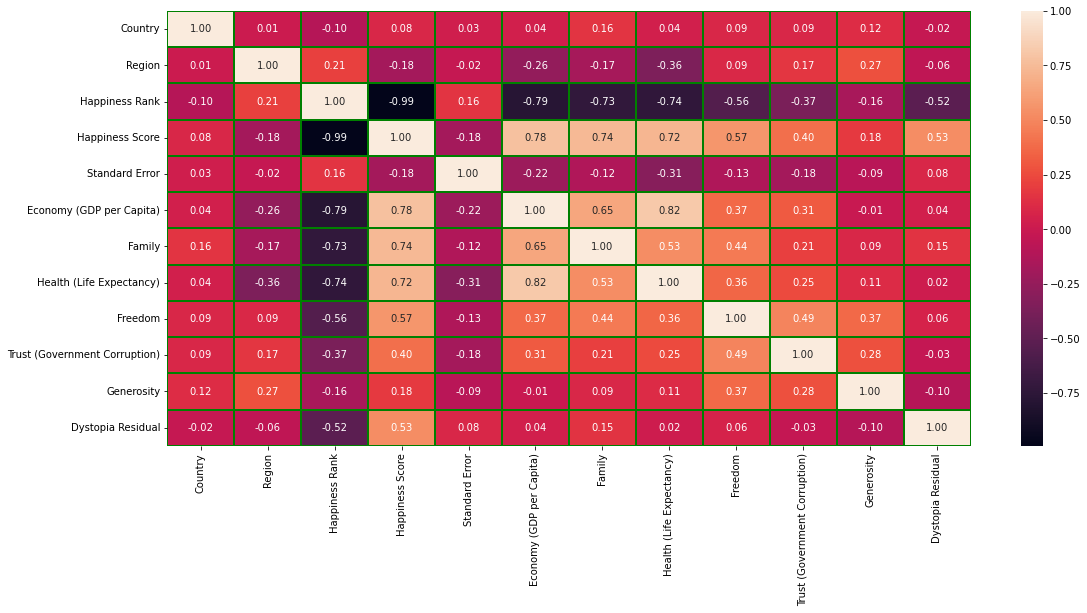

In [27]:
#Here wee see the corelation with the use of heatmap.
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True,linewidth=0.1,linecolor='green',fmt="0.2f")
plt.show()

# Checking the columns which are positively and negative correlated with the target columns. 

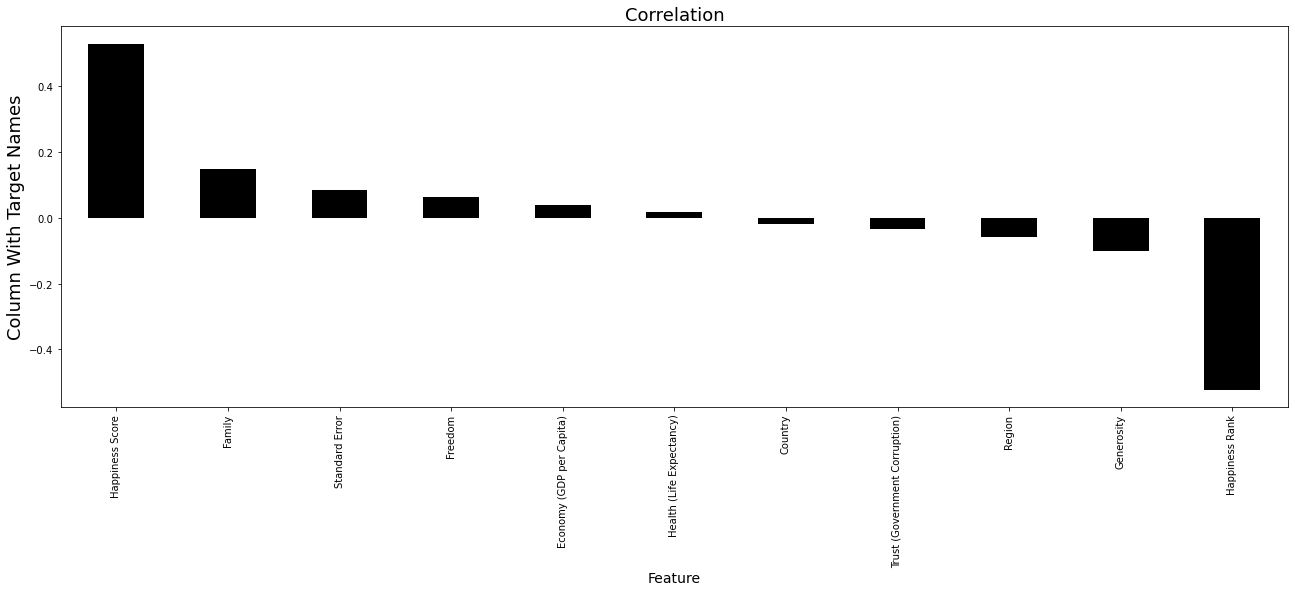

In [28]:
plt.figure(figsize=(22,7))
data.corr()['Dystopia Residual'].sort_values(ascending=False).drop('Dystopia Residual').plot(kind='bar',color='black')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column With Target Names",fontsize=18)
plt.title("Correlation",fontsize=18)
plt.show()

So, Here we clearly see ..

Negative  Correlation 

- Happiness Rank (Highly Correlated)


Positive Correlation

- Happiness Score (Highly Correlated)

# Lets Check Skewness

In [29]:
data.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

So here i am take skewness range +/- 0.5  is good for us.  



So lets check which column does not lie in this range.

- Country
 
- Happiness Rank

- Region

- Happiness Score

- Standard Error

- Economy (GDP per Capita)


- Family


- Trust (Government Corruption)


- Generosity


Almost column have skewness,  only one columns has come in our range.  (Health (Life Expectancy)

# Outliers Check


#  Checking the ouliers on the int and float type of columns.

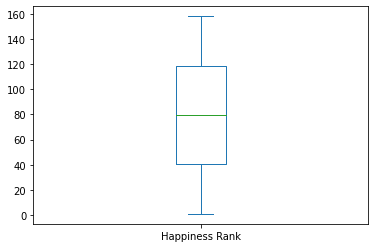

In [30]:
data['Happiness Rank'].plot.box()
plt.show()

We see that there is no  outliers

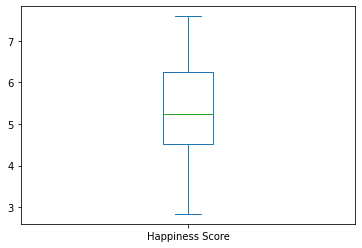

In [31]:
data['Happiness Score'].plot.box()
plt.show()

Happiness Score we clearly see that there is no outliers

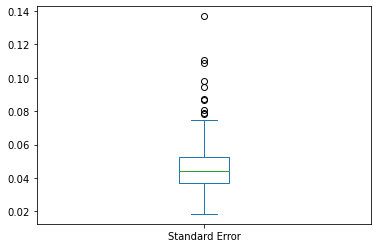

In [32]:
data['Standard Error'].plot.box()
plt.show()

Standard Error contains some outliers.

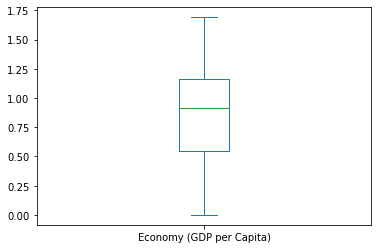

In [33]:
data['Economy (GDP per Capita)'].plot.box()
plt.show()

Economy (GDP per Capita) there is not outliers

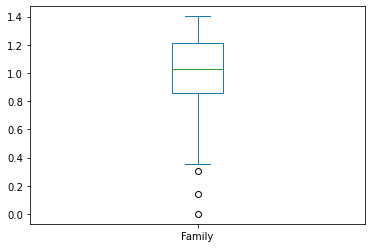

In [34]:
data['Family'].plot.box()
plt.show()

Family contains some outliers.

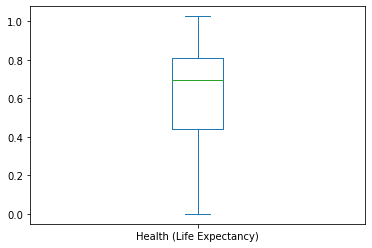

In [35]:
data['Health (Life Expectancy)'].plot.box()
plt.show()

Health (Life Expectancy) is not containing outliers

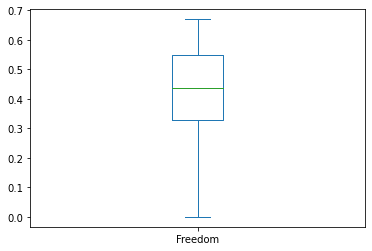

In [36]:
data['Freedom'].plot.box()
plt.show()

Freedom not contain outliers.

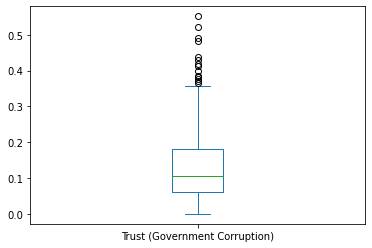

In [37]:
data['Trust (Government Corruption)'].plot.box()
plt.show()

'Trust (Government Corruption)' contains outliers.

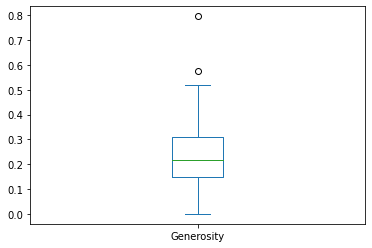

In [38]:
data['Generosity'].plot.box()
plt.show()


Generosity contains outliers.

So . we all know only 4 columns has ouliers 

- Standard Error

- Family


- Trust (Government Corruption)


- Generosity





In [39]:
#Lets handle the outliers by zscore
#lets import zscore
from scipy.stats import zscore
import numpy as np

In [40]:
z_score=zscore(data[['Standard Error','Family','Trust (Government Corruption)','Generosity']])
abs_score=np.abs(z_score)
filtering_entry=(z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,77.532895,5.111842,79.125000,5.385099,0.046503,0.851399,0.992761,0.633081,0.425658,0.140129,0.232700,2.109386
std,46.116598,3.022103,45.671924,1.145437,0.014061,0.393160,0.274875,0.249586,0.151132,0.112452,0.120410,0.544416
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,37.750000,3.000000,39.750000,4.542000,0.037145,0.579618,0.863468,0.440095,0.326415,0.062795,0.144985,1.779525
50%,76.500000,4.500000,79.500000,5.232500,0.043805,0.918560,1.029510,0.700925,0.432520,0.107220,0.214105,2.095415
75%,117.500000,8.000000,118.250000,6.275500,0.051095,1.155523,1.220705,0.813548,0.543400,0.176212,0.301820,2.465407
max,157.000000,9.000000,158.000000,7.587000,0.098110,1.563910,1.402230,1.025250,0.669730,0.492100,0.576300,3.602140


# Lets check How much data is loss .


In [41]:
data.shape

(152, 12)

In [42]:
data_loss=((158-152)/158)*100 # 158  is old shape of our dataset. and 120  is the latest shape of our dataset.
data_loss# Here . we calculate the percentage.

3.79746835443038

In [43]:
#Only 3 % percent loss.
#But dont forget our dataset is also small.
# 3% data loss we can manage
# and our data is so small so we dont delete any columns .

# Lets separte the feature and label.

In [44]:
x=data.drop(columns=['Dystopia Residual'],axis=1)
y=data['Dystopia Residual']

# Transforming data to remove skewness

In [45]:
from sklearn.preprocessing import power_transform

In [46]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.17565162,  1.23382594, -2.05166159, ...,  1.76289798,
         1.82810562,  0.64977124],
       [-0.30794389,  1.23382594, -1.9970966 , ...,  1.45162489,
         0.33064527,  1.55001632],
       [-0.80727505,  1.23382594, -1.9474605 , ...,  1.62465652,
         1.96449646,  0.96664187],
       ...,
       [ 1.19279986, -0.29245932,  1.53400762, ..., -1.65594482,
         0.76502091,  1.74117772],
       [-1.25014973,  0.94921122,  1.55122304, ..., -1.84106987,
        -0.14997234, -0.18118688],
       [ 1.27796192,  0.94921122,  1.56840821, ..., -0.48334779,
        -0.06305936, -0.47649345]])

In [47]:
#Checking skewnness
pd.DataFrame(x).skew().sort_values()

0    -0.269880
2    -0.268593
1    -0.230039
7    -0.194508
6    -0.175853
5    -0.140606
8    -0.075718
3    -0.026561
4    -0.024501
10    0.025848
9     0.169590
dtype: float64

Here we use power_transform to remove the skewness.


Here we clearly see  we remove the skewness of our dataset .


And we all know that . if we use power_transform method then we dont need to standardize our data.

In [103]:
#lets make model.
#Import train_test_split
from sklearn.model_selection import train_test_split
#Import algorithms for model building
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#For checking accuracy
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

In [105]:
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    x_pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.9713933136272862
 At random state 0 , the testing accuracy is :- 0.9758868361327421


 At random state 1 , the testing accuracy is :- 0.9715201446918111
 At random state 1 , the testing accuracy is :- 0.9789920692490692


 At random state 2 , the testing accuracy is :- 0.9727303684853652
 At random state 2 , the testing accuracy is :- 0.9699170807887583


 At random state 3 , the testing accuracy is :- 0.9717852323765426
 At random state 3 , the testing accuracy is :- 0.9761933951436444


 At random state 4 , the testing accuracy is :- 0.9707539725894079
 At random state 4 , the testing accuracy is :- 0.9810848205685054


 At random state 5 , the testing accuracy is :- 0.9752249614336567
 At random state 5 , the testing accuracy is :- 0.9552482591531414


 At random state 6 , the testing accuracy is :- 0.971203680985776
 At random state 6 , the testing accuracy is :- 0.9791549830834447


 At random state 7 , the testing accuracy is :- 0

So , we select random state 4

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)


In [107]:
#Lets fit the model
lr.fit(x_train,y_train)

LinearRegression()

In [108]:
#Lets Check Score
lr.score(x_train,y_train)#Training Score
x_pred=lr.predict(x_train)
s_pred=r2_score(y_train,x_pred)
s_pred

0.9707539725894079

In [109]:
#Lets Check Score
lr.score(x_test,y_test)#Testing Score
y_pred=lr.predict(x_test)
g_pred=r2_score(y_test,y_pred)
g_pred

0.9810848205685054

# Lets Check Cross Validation Score

In [110]:
#Lets import cross_val_score
from sklearn.model_selection import cross_val_score

In [111]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the Cross_val_Score for training is {s_pred} and accuracy for testing is {g_pred}")

At cross fold 2 the Cross_val_Score for training is 0.9707539725894079 and accuracy for testing is 0.9810848205685054
At cross fold 3 the Cross_val_Score for training is 0.9707539725894079 and accuracy for testing is 0.9810848205685054
At cross fold 4 the Cross_val_Score for training is 0.9707539725894079 and accuracy for testing is 0.9810848205685054
At cross fold 5 the Cross_val_Score for training is 0.9707539725894079 and accuracy for testing is 0.9810848205685054
At cross fold 6 the Cross_val_Score for training is 0.9707539725894079 and accuracy for testing is 0.9810848205685054
At cross fold 7 the Cross_val_Score for training is 0.9707539725894079 and accuracy for testing is 0.9810848205685054
At cross fold 8 the Cross_val_Score for training is 0.9707539725894079 and accuracy for testing is 0.9810848205685054
At cross fold 9 the Cross_val_Score for training is 0.9707539725894079 and accuracy for testing is 0.9810848205685054


So ,we can see that . Linear Regression and Cross_Val_Score almost give same result.

# Lets , Print Best Fit Line Using Scatter Plot

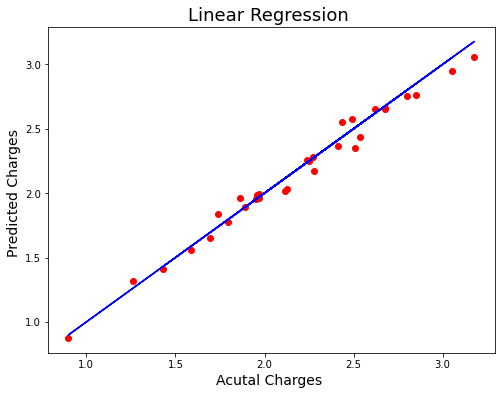

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Linear Regression ",fontsize=18)
plt.savefig('lr.png')
plt.show()


So ,we can clearly see that best fit line pass through maximum data points.

# Lets Do Hyperparameter Tuning 


We got good accuracuy but lets check how much accuracy increased with tuning the parameter.

In [113]:
#Import GridSearch CV
from sklearn.model_selection import GridSearchCV

In [117]:
#Import LASSO (Least absolute shrinkage and selection operator)
from sklearn.linear_model import Lasso



In [118]:
param={'alpha':[.0001,.001,.01,.1,1,10],
          'random_state':list(range(0,10))} #Here we assinging the multiple parameters for getting best one.

In [120]:
ls=Lasso()
clf=GridSearchCV(ls,param)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [140]:
cnn=Lasso(alpha=.0002,random_state=9)

In [141]:
cnn.fit(x_train,y_train) # Here we fit the model. with our best parameters.

Lasso(alpha=0.0002, random_state=9)

In [142]:
cnn.score(x_train,y_train)#Training Score

0.9707504127726995

In [143]:
cnn.score(x_test,y_test)#Testing Score

0.9809688930591983

I tried Lots of time but i dont get better accuracy ..


So here we are using Linear Regression . and We got .


Training Score - 97 %


Testing Score - 98 %



So our Model is ready for testing .

# Lets Use One More Algorithm

# RandomForestRegressor

In [144]:
#Lets import RandomForesrtRegressor

In [145]:
from sklearn.ensemble import RandomForestRegressor

In [146]:
rf=RandomForestRegressor()

In [153]:
rf.fit(x_train,y_train)#Here we fit our data

RandomForestRegressor()

In [154]:
rf.score(x_train,y_train)#For Training Score

0.9363794010677848

In [155]:
rf.score(x_test,y_test)#For testing Score

0.7480574480771207

But we can clearly see that we dont get much accuracy lets do hyperparameter tuning.

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
#lets create best parameters for hyperparameter tuning.

In [163]:
param={'criterion':['mse','mae'],
          'max_features':['auto','sqrt','log2']}

In [164]:
#Lets apply the parameters 
rf=RandomForestRegressor()
clf=GridSearchCV(rf,param)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [168]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')#Initiate best parameters in RandomForestRegressor

rf.fit(x_train,y_train) #Fitting the training data.

rf.score(x_train,y_train) # Training Score

rf_pred=rf.predict(x_test) #Assigning the new variable name for getting r2_score

rf_score=r2_score(y_test,pred_decision)

print("R2 Score",rfs*100)


R2 Score 74.6551144370393


In [170]:
#So here we got  74 % . and in Linear Regresson we got 98 % . So i am going with linear Regression

In [172]:
cnn.score(x_train,y_train)#Linear Regression Training Score

0.9707504127726995

In [173]:
cnn.score(x_test,y_test)#Linear Regression Testing Score

0.9809688930591983

# Lets Check r2_score for both Training and Testing .

In [180]:
x_pred=cnn.predict(x_train) #Training Score (r2_score)
r2_score(y_train,x_pred) *100

97.07504127726995

In [181]:
y_pred=cnn.predict(x_test)
r2_score(y_test,y_pred)*100 #Testing Score (r2_score)

98.09688930591983

We are getting model accuracy and cross validatiion both as 98.09 % which shows our model is performing extremly well.

# Lets Save the Model

In [191]:
import pickle

file_name=('World Happiness')

pickle.dump(rf,open(file_name,'wb'))

# Conclusion

In [200]:
loaded_model=pickle.load(open('World Happiness','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)#I dont why is showing wrong prediction

73.46012841136593


In [197]:
conclusion=pd.DataFrame([loaded_model.predict(x_train)[:],pred_decision[:]],index=['predicted','original'])

In [198]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
predicted,1.943269,1.525601,2.574816,2.173567,1.778393,1.788643,1.808609,1.416424,1.907293,2.119814,...,1.423792,1.750132,2.045479,1.899468,1.239168,2.319297,2.03256,2.070135,1.603613,1.784506
original,2.199013,2.248738,1.746702,1.717287,1.718877,2.439212,1.962621,2.432872,2.452386,2.065784,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
#Student of DataScience
#Student of DataTrained- Saurav
#Date-19-10-22
#Time - 21:12